### Libraries

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

### Load dataset

In [68]:
# Load the dataset
data = pd.read_csv('data.csv')

# Dataset Insight

### 1 - A

In [69]:
# Number of rows
total_rows = data.shape[0]
total_rows

8950

In [70]:
# Count missing values
missing_values_per_column = data.isnull().sum()
missing_values_per_column

CLIENT_ID                            0
ACCOUNT_BALANCE                      0
BALANCE_UPDATE_FREQUENCY             0
TOTAL_PURCHASES                      0
SINGLE_PURCHASE_AMOUNT               0
INSTALLMENT_PURCHASES_AMOUNT         0
ADVANCE_CASH_AMOUNT                  0
PURCHASES_UPDATE_FREQUENCY           0
SINGLE_PURCHASE_FREQUENCY            0
INSTALLMENT_PURCHASES_FREQUENCY      0
CASH_ADVANCE_FREQUENCY               0
CASH_ADVANCE_TRANSACTIONS            0
PURCHASES_TRANSACTION_COUNT          0
CREDIT_MAXIMUM                       1
AMOUNT_PAID                          0
MINIMUM_PAYMENT_AMOUNT             313
FULL_PAYMENT_PERCENTAGE              0
CREDIT_CARD_TENURE                   0
dtype: int64

based on the count of missing values in features, CREDIT_MAXIMUM and MINIMUM_PAYMENT_AMOUNT are only two features that have missing values. drop that one row of CREDIT_MAXIMUM that contains missing values and fill missing values of the MINIMUM_PAYMENT_AMOUNT by median (why?)

(why?)

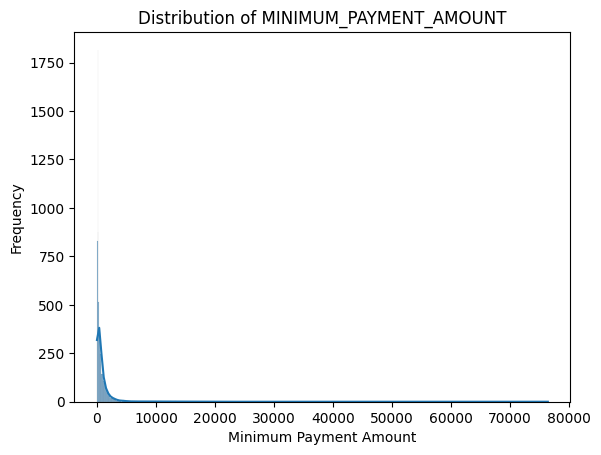

count     8637.000000
mean       864.206542
std       2372.446607
min          0.019163
25%        169.123707
50%        312.343947
75%        825.485459
max      76406.207520
Name: MINIMUM_PAYMENT_AMOUNT, dtype: float64

In [71]:
# Distribution of MINIMUM_PAYMENT_AMOUNT
sns.histplot(data['MINIMUM_PAYMENT_AMOUNT'].dropna(), kde=True)
plt.title('Distribution of MINIMUM_PAYMENT_AMOUNT')
plt.xlabel('Minimum Payment Amount')
plt.ylabel('Frequency')
plt.show()

# Summary statistics
summary_statistics = data['MINIMUM_PAYMENT_AMOUNT'].describe()
summary_statistics

Also we can see, The distribution of the MINIMUM_PAYMENT_AMOUNT is heavily right-skewed, with a significant presence of outliers. so using of median is better way than mean.

### 1 - B

In [72]:
# Select numerical columns
numerical_data = data.select_dtypes(include=['number'])

# Calculating skewness
skewness = numerical_data.skew()

# Mean and median values
mean_values = numerical_data.mean()
median_values = numerical_data.median()

# Compare mean and median values
mean_median_comparison = mean_values > median_values

mean_median_comparison, skewness

(ACCOUNT_BALANCE                     True
 BALANCE_UPDATE_FREQUENCY           False
 TOTAL_PURCHASES                     True
 SINGLE_PURCHASE_AMOUNT              True
 INSTALLMENT_PURCHASES_AMOUNT        True
 ADVANCE_CASH_AMOUNT                 True
 PURCHASES_UPDATE_FREQUENCY         False
 SINGLE_PURCHASE_FREQUENCY           True
 INSTALLMENT_PURCHASES_FREQUENCY     True
 CASH_ADVANCE_FREQUENCY              True
 CASH_ADVANCE_TRANSACTIONS           True
 PURCHASES_TRANSACTION_COUNT         True
 CREDIT_MAXIMUM                      True
 AMOUNT_PAID                         True
 MINIMUM_PAYMENT_AMOUNT              True
 FULL_PAYMENT_PERCENTAGE             True
 CREDIT_CARD_TENURE                 False
 dtype: bool,
 ACCOUNT_BALANCE                     2.393386
 BALANCE_UPDATE_FREQUENCY           -2.023266
 TOTAL_PURCHASES                     8.144269
 SINGLE_PURCHASE_AMOUNT             10.045083
 INSTALLMENT_PURCHASES_AMOUNT        7.299120
 ADVANCE_CASH_AMOUNT                 5.166

In [73]:
# Calculate IQR
Q1 = numerical_data.quantile(0.25)
Q3 = numerical_data.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = ((numerical_data < (Q1 - 6 * IQR)) | (numerical_data > (Q3 + 6 * IQR))).sum()
outliers

ACCOUNT_BALANCE                      18
BALANCE_UPDATE_FREQUENCY            343
TOTAL_PURCHASES                     130
SINGLE_PURCHASE_AMOUNT              209
INSTALLMENT_PURCHASES_AMOUNT        121
ADVANCE_CASH_AMOUNT                 156
PURCHASES_UPDATE_FREQUENCY            0
SINGLE_PURCHASE_FREQUENCY             0
INSTALLMENT_PURCHASES_FREQUENCY       0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRANSACTIONS            98
PURCHASES_TRANSACTION_COUNT          98
CREDIT_MAXIMUM                        0
AMOUNT_PAID                         140
MINIMUM_PAYMENT_AMOUNT              181
FULL_PAYMENT_PERCENTAGE             488
CREDIT_CARD_TENURE                 1366
dtype: int64

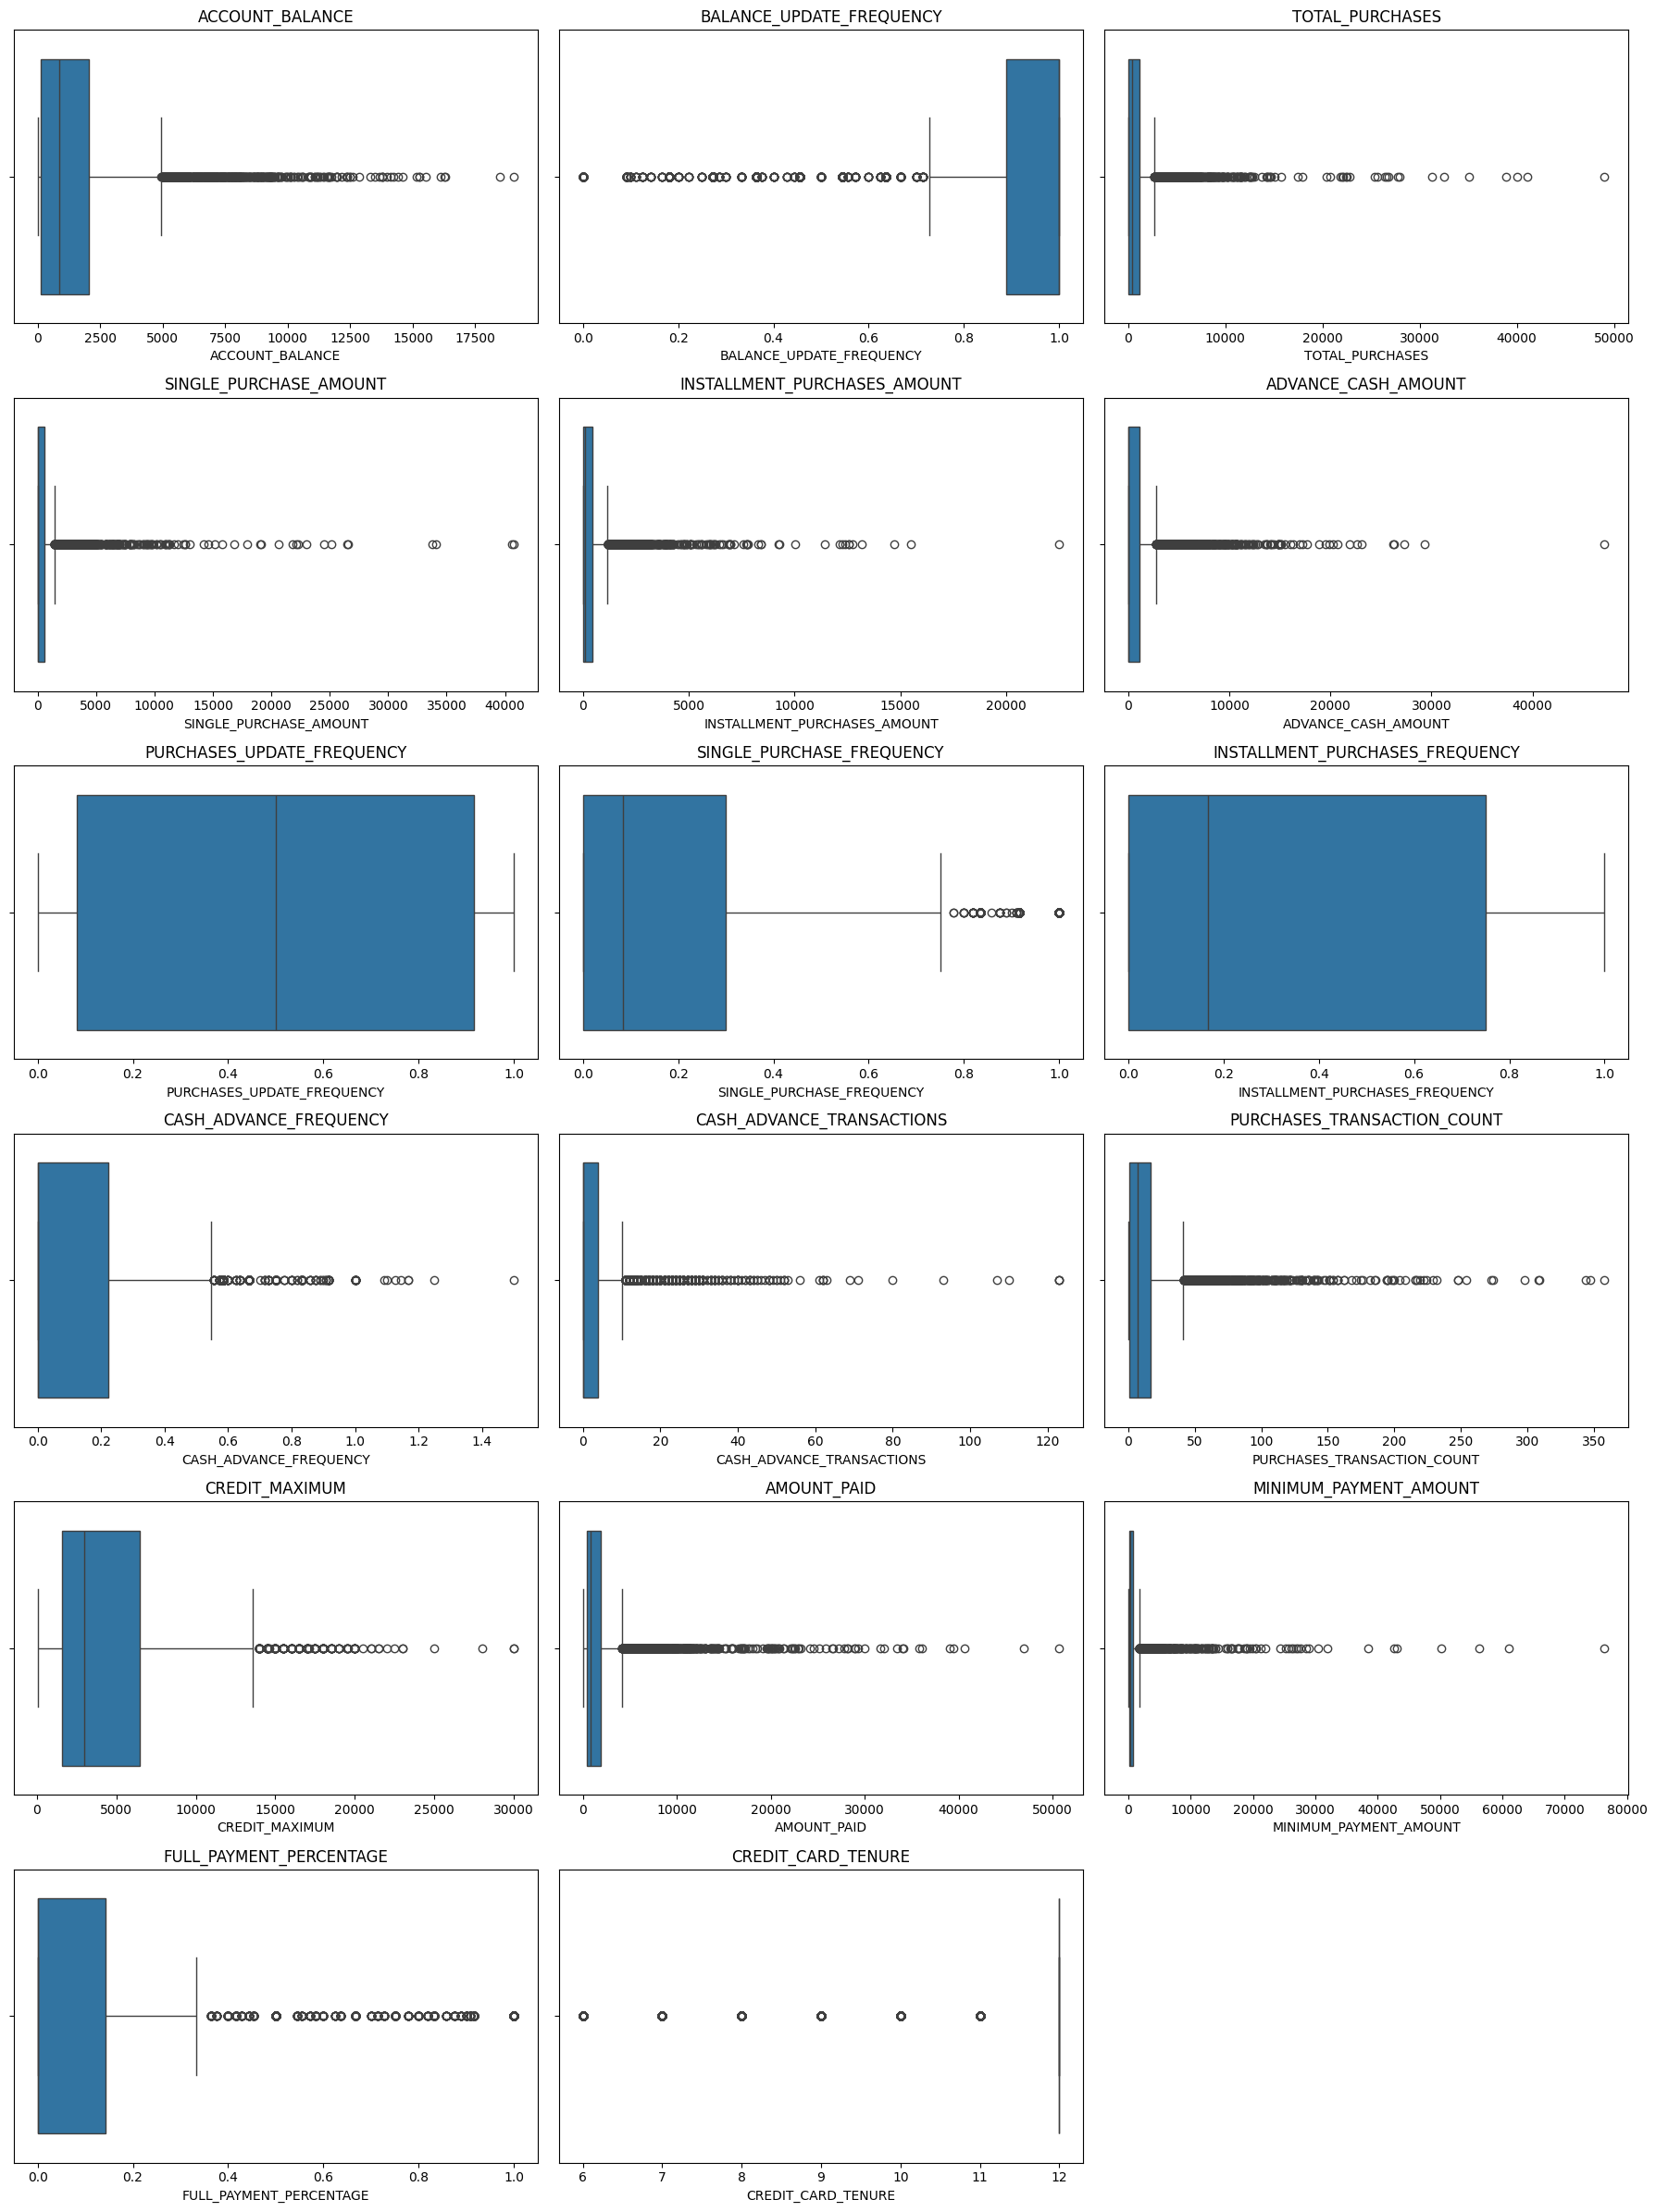

In [74]:
# Plotting box plots
num_columns = numerical_data.columns
n_cols = 3
n_rows = (len(num_columns) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 6, n_rows * 4))
for i, col in enumerate(num_columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(x=numerical_data[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [ ]:
def detect_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    return ((series < (Q1 - 6 * IQR)) | (series > (Q3 + 6 * IQR)))

# Plotting scatter plots
num_columns = numerical_data.columns
n_cols = 3
n_rows = (len(num_columns) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 6, n_rows * 4))
for i, col in enumerate(num_columns):
    plt.subplot(n_rows, n_cols, i + 1)
    outliers_mask = detect_outliers(numerical_data[col])
    plt.scatter(range(len(numerical_data[col])), numerical_data[col], c='blue', label='Data', alpha=0.6)
    plt.scatter(numerical_data[col][outliers_mask].index, numerical_data[col][outliers_mask], c='red', label='Outliers', alpha=0.8)
    plt.title(col)
    plt.xlabel('Index')
    plt.ylabel(col)
    if i == 0:
        plt.legend()

plt.tight_layout()
plt.show()

### 1 - C

In [ ]:
# Number of unique values
unique_values = data.nunique()

# Check for duplicate rows
duplicates = data.duplicated().sum()

unique_values, duplicates

### 1 - D

In [ ]:
# Plotting histograms
num_columns = numerical_data.columns
n_cols = 3
n_rows = (len(num_columns) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 6, n_rows * 4))
for i, col in enumerate(num_columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(numerical_data[col], kde=False, color='blue')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### 1 - E

In [ ]:
corr_matrix = numerical_data.corr()

# Filter the corr matrix
high_corr = corr_matrix[abs(corr_matrix) > 0.4]

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(high_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of High Correlations (Absolute Values > 0.4)')
plt.show()

# Pre-Processing

### 2 - A

In [ ]:
# Handle missing values
data.dropna(subset=['CREDIT_MAXIMUM'], inplace=True)
median_value = data['MINIMUM_PAYMENT_AMOUNT'].median()
data['MINIMUM_PAYMENT_AMOUNT'].fillna(median_value, inplace=True)

In [ ]:
data.shape[0]

In [ ]:
# Exclude non-numeric columns
numeric_columns = data.select_dtypes(include=['number']).columns

# Standardize the data for skewness
scaler = StandardScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Remove outliers
Q1 = data[numeric_columns].quantile(0.25)
Q3 = data[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 8 * IQR
upper_bound = Q3 + 8 * IQR
data = data[~((data[numeric_columns] < lower_bound) | (data[numeric_columns] > upper_bound)).any(axis=1)]

In [ ]:
missing_values = data.isnull().sum()
skewness = data[numeric_columns].skew()
missing_values, skewness

In [ ]:
data['ACCOUNT_BALANCE'].max()

In [84]:
data.shape[0]

7102

# Clustering

### 3 - 1

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

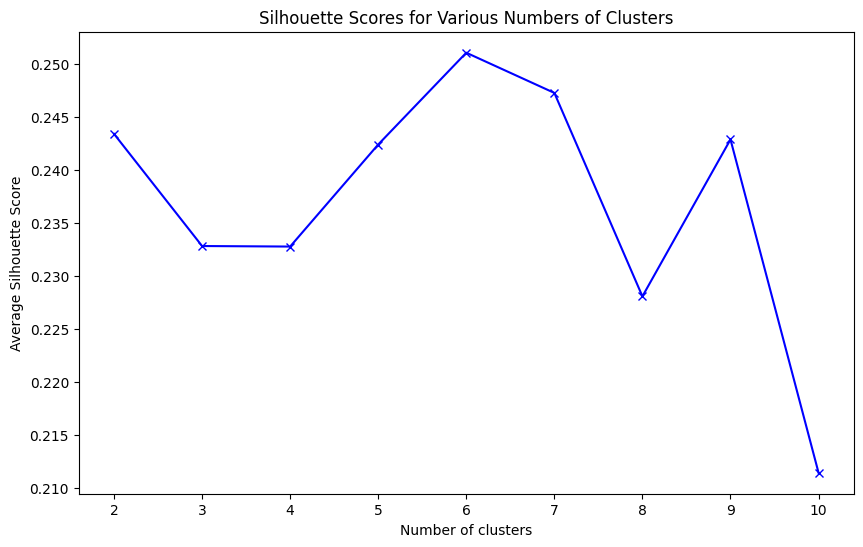

In [85]:
silhouette_avg = []
range_n_clusters = range(2, 11)

# Calculate silhouette scores
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(data[numeric_columns])
    silhouette_avg.append(silhouette_score(data[numeric_columns], cluster_labels))

plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_avg, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Scores for Various Numbers of Clusters')
plt.show()

### 3 - 2

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


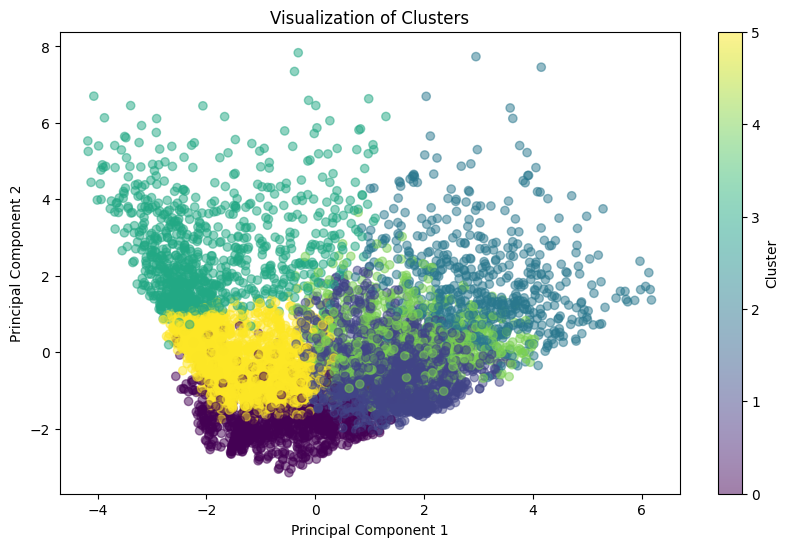

In [86]:
# Apply PCA
pca = PCA(n_components=7)
principal_components = pca.fit_transform(data[numeric_columns])

# Apply KMeans
kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(data[numeric_columns])

# Lable
data['Cluster'] = clusters


plt.figure(figsize=(10, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=clusters, cmap='viridis', marker='o', alpha=0.5)
plt.title('Visualization of Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [37]:
data

,CLIENT_ID,ACCOUNT_BALANCE,BALANCE_UPDATE_FREQUENCY,TOTAL_PURCHASES,SINGLE_PURCHASE_AMOUNT,INSTALLMENT_PURCHASES_AMOUNT,ADVANCE_CASH_AMOUNT,PURCHASES_UPDATE_FREQUENCY,SINGLE_PURCHASE_FREQUENCY,INSTALLMENT_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRANSACTIONS,PURCHASES_TRANSACTION_COUNT,CREDIT_MAXIMUM,AMOUNT_PAID,MINIMUM_PAYMENT_AMOUNT,FULL_PAYMENT_PERCENTAGE,CREDIT_CARD_TENURE,Cluster
0,C10001,-0.732054,-0.249881,-0.424934,-0.356957,-0.349114,-0.466805,-0.806649,-0.678716,-0.707409,-0.675294,-0.476083,-0.511381,-0.960380,-0.529026,-0.302427,-0.525588,0.360541,5
1,C10002,0.786858,0.134049,-0.469584,-0.356957,-0.454607,2.605438,-1.221928,-0.678716,-0.917090,0.573949,0.110032,-0.591841,0.688601,0.818546,0.097453,0.234159,0.360541,3
2,C10003,0.447041,0.517980,-0.107716,0.108843,-0.454607,-0.466805,1.269742,2.673295,-0.917090,-0.675294,-0.476083,-0.109082,0.826016,-0.383857,-0.093330,-0.525588,0.360541,4
3,C10004,0.049015,-1.017743,0.231995,0.546123,-0.454607,-0.368678,-1.014290,-0.399383,-0.917090,-0.258882,-0.329554,-0.551611,0.826016,-0.598733,-0.228291,-0.525588,0.360541,0
4,C10005,-0.358849,0.517980,-0.462095,-0.347317,-0.454607,-0.466805,-1.014290,-0.399383,-0.917090,-0.675294,-0.476083,-0.551611,-0.905414,-0.364421,-0.257295,-0.525588,0.360541,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8754,C18993,-0.532882,0.517980,-0.287192,-0.330027,-0.073108,-0.334768,1.269742,-0.399383,1.389402,-0.258882,0.110032,-0.028623,-0.960380,-0.581948,1.199931,-0.214783,0.360541,1
8755,C18994,-0.750245,-3.321332,-0.469584,-0.356957,-0.454607,-0.427910,-1.221928,-0.678716,-0.917090,-0.258882,-0.329554,-0.591841,-1.097795,-0.598733,-0.228291,-0.525588,0.360541,0
8756,C18995,-0.730322,0.517980,-0.281548,-0.356957,-0.010343,-0.466805,1.062103,-0.678716,1.389402,-0.675294,-0.476083,-0.109082,-0.822965,-0.498184,-0.291430,1.525731,0.360541,1
8759,C18998,-0.719334,0.517980,-0.331515,-0.356957,-0.128398,-0.466805,0.023907,-0.678716,0.131316,-0.675294,-0.476083,-0.350461,-0.960380,-0.513867,-0.290588,0.500071,0.360541,1


In [28]:
centroids = kmeans.cluster_centers_

### 3 - 3

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


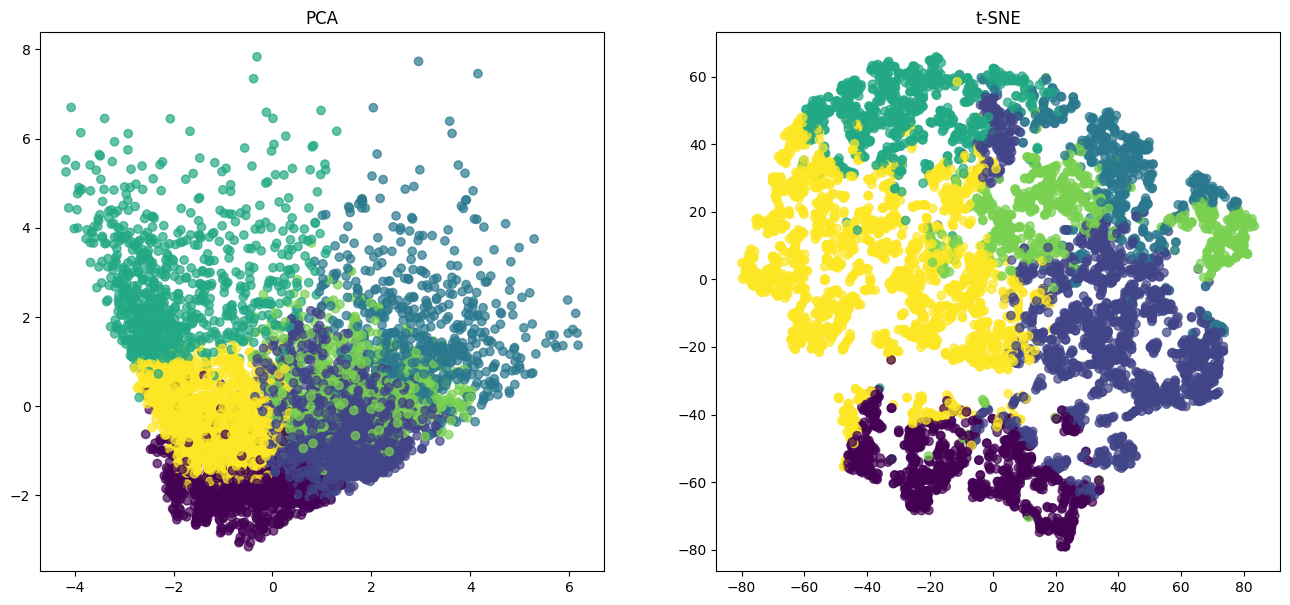

In [30]:
# Apply KMeans
kmeans = KMeans(n_clusters=6, random_state=42)  # Adjust n_clusters based on earlier analysis
cluster_labels = kmeans.fit_predict(data[numeric_columns])

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data[numeric_columns])

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(data[numeric_columns])


fig, ax = plt.subplots(1, 2, figsize=(16, 7))

# PCA Plot
ax[0].scatter(pca_result[:, 0], pca_result[:, 1], c=cluster_labels, cmap='viridis', marker='o', alpha=0.7)
ax[0].set_title('PCA')

# t-SNE Plot
ax[1].scatter(tsne_result[:, 0], tsne_result[:, 1], c=cluster_labels, cmap='viridis', marker='o', alpha=0.7)
ax[1].set_title('t-SNE')

plt.show()

### 3 - 4

In [57]:
# Load rawdata
rawdata = pd.read_csv('data.csv')

In [59]:
rawdata.dropna(subset=['CREDIT_MAXIMUM'], inplace=True)
median_value = rawdata['MINIMUM_PAYMENT_AMOUNT'].median()
rawdata['MINIMUM_PAYMENT_AMOUNT'].fillna(median_value, inplace=True)

In [60]:
rawdata.shape[0]

8949

In [61]:
# Apply KMeans
kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(rawdata[numeric_columns])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [62]:
rawdata['Cluster'] = clusters

In [63]:
# Update numeric columns
numeric_columns = rawdata.select_dtypes(include=['number']).columns

In [64]:
# Calculate mean for features in each cluster
cluster_means = rawdata[numeric_columns].groupby('Cluster').mean()

In [51]:
cluster_means

,ACCOUNT_BALANCE,BALANCE_UPDATE_FREQUENCY,TOTAL_PURCHASES,SINGLE_PURCHASE_AMOUNT,INSTALLMENT_PURCHASES_AMOUNT,ADVANCE_CASH_AMOUNT,PURCHASES_UPDATE_FREQUENCY,SINGLE_PURCHASE_FREQUENCY,INSTALLMENT_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRANSACTIONS,PURCHASES_TRANSACTION_COUNT,CREDIT_MAXIMUM,AMOUNT_PAID,MINIMUM_PAYMENT_AMOUNT,FULL_PAYMENT_PERCENTAGE,CREDIT_CARD_TENURE
Cluster,,,,,,,,,,,,,,,,,
0,-0.696722,-1.999647,-0.303182,-0.229170,-0.295696,-0.317755,-0.587499,-0.441827,-0.472540,-0.516253,-0.369571,-0.421380,-0.160902,-0.229121,-0.288447,0.343130,0.360541
1,-0.401065,0.334429,-0.063287,-0.253141,0.315355,-0.379084,0.992930,-0.404770,1.216240,-0.490330,-0.375457,0.162981,-0.274185,-0.237399,-0.141056,0.317251,0.360541
2,0.450190,0.456658,1.176633,0.834411,1.248092,-0.180773,1.188633,1.449753,1.324240,-0.227794,-0.175648,1.718373,0.875232,0.586495,0.032687,0.151745,0.360541
3,1.564212,0.460947,-0.282076,-0.207064,-0.286581,1.266651,-0.567414,-0.296825,-0.484306,1.559162,1.280845,-0.341133,0.892019,0.349880,0.314110,-0.443998,0.360541
4,-0.277211,0.386882,0.278474,0.468881,-0.203018,-0.373900,0.879252,1.931750,-0.234213,-0.487133,-0.374510,0.318211,0.278464,-0.017502,-0.179841,0.489749,0.360541
5,-0.092048,0.412631,-0.360427,-0.247405,-0.397565,-0.165856,-0.855446,-0.408510,-0.747392,0.014939,-0.091134,-0.483576,-0.378357,-0.271150,-0.111322,-0.454753,0.360541


        ACCOUNT_BALANCE                                                    \
                  count      mean       std       min       25%       50%   
Cluster                                                                     
0                 974.0 -0.696722  0.112977 -0.751704 -0.747570 -0.738058   
1                1711.0 -0.401065  0.468638 -0.751275 -0.721037 -0.627754   
2                 576.0  0.450190  1.139116 -0.745622 -0.476267  0.140740   
3                 828.0  1.564212  1.265348 -0.714175  0.637635  1.465491   
4                 779.0 -0.277211  0.578660 -0.751505 -0.677740 -0.554717   
5                2234.0 -0.092048  0.503077 -0.751053 -0.458972 -0.198732   

                            BALANCE_UPDATE_FREQUENCY            ...  \
              75%       max                    count      mean  ...   
Cluster                                                         ...   
0       -0.706502  0.245495                    974.0 -1.999647  ...   
1       -0.217498  2.2

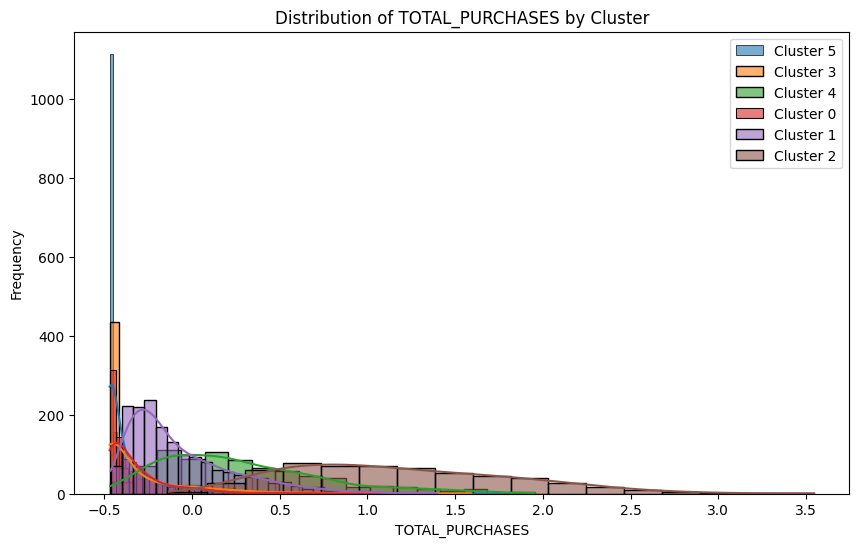

In [88]:
# Calculate descriptive statistics for each cluster
cluster_descriptions = data.groupby('Cluster').describe()

# Print the descriptive statistics for each cluster
print(cluster_descriptions)

# Plot distributions of a key feature for each cluster
feature_to_plot = 'TOTAL_PURCHASES'  # Change this to a key feature from your dataset

fig, ax = plt.subplots(figsize=(10, 6))
for cluster in data['Cluster'].unique():
    cluster_data = data[data['Cluster'] == cluster][feature_to_plot]
    sns.histplot(cluster_data, kde=True, label=f'Cluster {cluster}', ax=ax, alpha=0.6)

ax.set_title(f'Distribution of {feature_to_plot} by Cluster')
ax.set_xlabel(feature_to_plot)
ax.set_ylabel('Frequency')
ax.legend()
plt.show()
